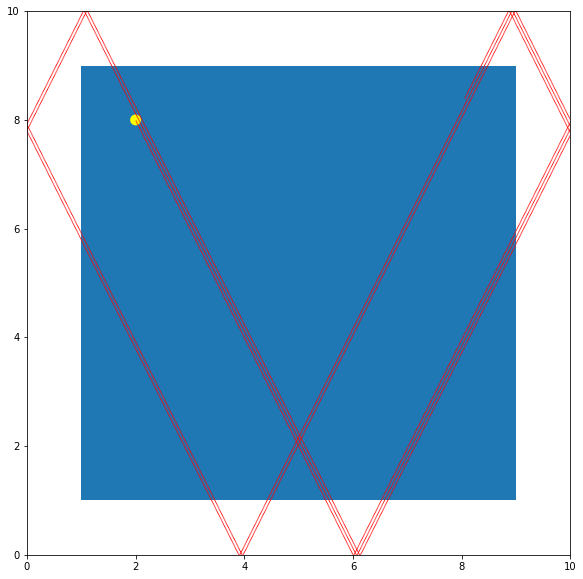

In [65]:
a=[1,1]
b=[1,9]
c=[9,1]
d=[9,9]
width = c[0] - a[0]
height = d[1] - a[1]
lims = (0, 10)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


x=2
y=8

x_vel=0.01
y_vel=-0.02

coll=1

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle((1, 1), width, height))
ax1.add_patch(
    patches.Circle((x,y), radius=0.1, facecolor='yellow'))



    



for i in range(0,5000):
    if x<0 or x>10:
        x_vel = -x_vel      
    if y<0 or y>10:
        y_vel = -y_vel  
    x=x+x_vel
    y=y+y_vel
    ax1.add_patch(
    patches.Circle((x,y), radius=0.01, facecolor='red'))


      
    
    
# if x==10 or x == 0 or y == 10 or y == 0:
#     coll=coll+1  
    
    
    
# if coll==5:
#     break
    

#     ax1.add_patch(
#     patches.Circle(xy, radius=5))


plt.ylim(lims)
plt.xlim(lims)



fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('test2png.png', dpi=100)


plt.show()

In [ ]:
#### THE ONE BELOW IS A TRASH EXAMPLE, the collisions with walls are rectangle-only ####

In [3]:
# Dynamical Billiards Simulation
# FB - 201010295
# See Wikipedia for more info:
# http://en.wikipedia.org/wiki/Dynamical_billiards
import math
import random
from PIL import Image, ImageDraw
imgx = 800
imgy = 600
image = Image.new("RGB", (imgx, imgy))
draw = ImageDraw.Draw(image)

# Only 1 ball is used!
maxSteps = 15375 # of steps of ball motion (in constant speed)

n = random.randint(1, 7) # of circular obstacles
crMax = int(min(imgx - 1, imgy - 1) / 4) # max circle radius
crMin = 10 # min circle radius

# create circular obstacle(s)
cxList = []
cyList = []
crList = []
for i in range(n):
    while(True): # circle(s) must not overlap
        cr = random.randint(crMin, crMax) # circle radius
        cx = random.randint(cr, imgx - 1 - cr) # circle center x
        cy = random.randint(cr, imgy - 1 - cr) # circle center y
        flag = True
        if i > 0:
            for j in range(i):
                if math.hypot(cx - cxList[j], cy - cyList[j]) < cr + crList[j]:
                    flag = False
                    break
        if flag == True:
            break
    draw.ellipse((cx - cr, cy - cr, cx + cr, cy + cr))
    cxList.append(cx)
    cyList.append(cy)
    crList.append(cr)

# initial location of the ball must be outside of the circle(s)
while(True):
    x = float(random.randint(0, imgx - 1))
    y = float(random.randint(0, imgy - 1))
    flag = False
    for i in range(n):
        if math.hypot(x - cxList[i], y - cyList[i]) <= crList[i]:
            flag = True
            break
    if flag == False:
        break
    
# initial direction of the ball
a = 2.0 * math.pi * random.random()
s = math.sin(a)
c = math.cos(a)

for i in range(maxSteps):
    image.putpixel((int(x), int(y)), (255, 255, 255))
    xnew = x + c
    ynew = y + s

    # reflection from the walls
    if xnew < 0 or xnew > imgx - 1:
        c = -c
        xnew = x
    if ynew < 0 or ynew > imgy - 1:
        s = -s
        ynew = y

    # reflection from the circle(s)
    for i in range(n):
        if math.hypot(xnew - cxList[i], ynew - cyList[i]) <= crList[i]:
            # angle of the circle point
            ca = math.atan2(ynew - cyList[i], xnew - cxList[i])
            # reversed collision angle of the ball
            rca = math.atan2(-s, -c)
            # reflection angle of the ball
            rab = rca + (ca - rca) * 2
            s = math.sin(rab)
            c = math.cos(rab)
            xnew = x
            ynew = y

    x = xnew
    y = ynew
    
image.save("Dynamical_Billiards.png", "PNG")